# Web Scraping City Data Website and Get City Crime Data

In [3]:
import numpy as np
import requests
import bs4
import pandas as pd

# bs web scraping and store dataframes in to dictionary

In [4]:
filepath='City_state.csv'
city_names=np.genfromtxt(filepath,delimiter=',',dtype='str')
city_dict={}
for city in city_names:
    cityname=city[0].replace(' ','-')
    statename=city[1].replace(' ','-')
    my_request=requests.get('http://www.city-data.com/crime/crime-'+cityname+'-'+statename+'.html')
    soup=bs4.BeautifulSoup(my_request.text,'lxml')
    soup1=soup.select('section div table tr')
    soup_heading=soup.select('section.crime-table div table tr h4')
    index_heading=[heading.text.strip() for heading in soup_heading]
    soup_rows=soup.select('section.crime-table div table tr td')
    table_rows=[row.text.strip() for row in soup_rows]
    table_body=[None]*9
    for i in range(9):
        table_body[i]=table_rows[i*len(index_heading):(i+1)*len(index_heading)]

    df_table=pd.DataFrame(table_body,columns=index_heading)
    city_dict[cityname]=df_table

In [5]:
city_dict['Pittsburgh'][:-1]

,Type,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Murders(per 100,000)",47(13.7),67(20.0),46(13.8),63(19.0),56(17.3),52(16.7),72(23.2),39(12.5),55(17.6),44(14.3),41(13.1),45(14.6),69(22.4),57(18.6),57(18.8)
1,"Rapes(per 100,000)",148(43.2),136(40.6),99(29.6),117(35.4),102(31.4),129(41.3),136(43.9),116(37.2),66(21.1),67(21.7),47(15.1),78(25.4),91(29.6),82(26.7),100(33.1)
2,"Robberies(per 100,000)","1,616(471.8)","1,635(487.6)","1,602(479.3)","1,617(488.8)","1,722(530.5)","1,596(511.2)","1,541(497.5)","1,367(437.8)","1,190(380.5)","1,126(364.9)","1,134(363.3)",956(310.8),986(320.5),858(279.6),"1,000(330.6)"
3,"Assaults(per 100,000)","1,983(578.9)","1,721(513.3)","1,992(596.0)","1,588(480.1)","1,593(490.8)","1,678(537.5)","1,609(519.4)","1,565(501.2)","1,499(479.3)","1,239(401.5)","1,125(360.4)","1,180(383.6)","1,309(425.5)","1,170(381.3)","1,209(399.7)"
4,"Burglaries(per 100,000)","3,298(962.8)","3,180(948.4)","3,045(911.0)","3,018(912.4)","3,713(1,143.9)","3,418(1,094.9)","3,108(1,003.4)","2,811(900.3)","2,949(943.0)","2,686(870.4)","2,537(812.8)","2,173(706.4)","2,129(692.1)","2,197(715.9)","1,828(604.4)"
5,"Thefts(per 100,000)","10,108(2,951.0)","10,610(3,164.3)","9,841(2,944.4)","10,337(3,125.0)","9,658(2,975.3)","8,977(2,875.6)","8,258(2,666.0)","8,134(2,605.1)","7,678(2,455.1)","6,897(2,234.9)","7,610(2,438.2)","7,258(2,359.3)","7,157(2,326.6)","7,097(2,312.7)","7,222(2,387.9)"
6,"Auto thefts(per 100,000)","2,537(740.7)","2,645(788.8)","2,392(715.7)","2,273(687.2)","1,865(574.5)","1,538(492.7)","1,259(406.4)",830(265.8),657(210.1),480(155.5),544(174.3),616(200.2),597(194.1),601(195.8),818(270.5)
7,"Arson(per 100,000)",114(33.3),97(28.9),87(26.0),55(16.6),70(21.6),79(25.3),98(31.6),146(46.8),154(49.2),195(63.2),248(79.5),208(67.6),192(62.4),172(56.0),153(50.6)


## Merge DataFrames

In [6]:
city_data=pd.DataFrame()
for city in city_names[1:]:
    cityname=city[0].replace(' ','-')
    city_dict[cityname]['City']=city[0]
    city_dict[cityname]['State']=city[1]
    city_data=city_data.append(city_dict[cityname][:-1],sort=False)
    
city_new=city_data.replace('N/A',None).dropna(how='any').dropna(how='all')
city_new

,Type,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,City,State
0,"Murders(per 100,000)",47(13.7),67(20.0),46(13.8),63(19.0),56(17.3),52(16.7),72(23.2),39(12.5),55(17.6),44(14.3),41(13.1),45(14.6),69(22.4),57(18.6),57(18.8),Pittsburgh,Pennsylvania
1,"Rapes(per 100,000)",148(43.2),136(40.6),99(29.6),117(35.4),102(31.4),129(41.3),136(43.9),116(37.2),66(21.1),67(21.7),47(15.1),78(25.4),91(29.6),82(26.7),100(33.1),Pittsburgh,Pennsylvania
2,"Robberies(per 100,000)","1,616(471.8)","1,635(487.6)","1,602(479.3)","1,617(488.8)","1,722(530.5)","1,596(511.2)","1,541(497.5)","1,367(437.8)","1,190(380.5)","1,126(364.9)","1,134(363.3)",956(310.8),986(320.5),858(279.6),"1,000(330.6)",Pittsburgh,Pennsylvania
3,"Assaults(per 100,000)","1,983(578.9)","1,721(513.3)","1,992(596.0)","1,588(480.1)","1,593(490.8)","1,678(537.5)","1,609(519.4)","1,565(501.2)","1,499(479.3)","1,239(401.5)","1,125(360.4)","1,180(383.6)","1,309(425.5)","1,170(381.3)","1,209(399.7)",Pittsburgh,Pennsylvania
4,"Burglaries(per 100,000)","3,298(962.8)","3,180(948.4)","3,045(911.0)","3,018(912.4)","3,713(1,143.9)","3,418(1,094.9)","3,108(1,003.4)","2,811(900.3)","2,949(943.0)","2,686(870.4)","2,537(812.8)","2,173(706.4)","2,129(692.1)","2,197(715.9)","1,828(604.4)",Pittsburgh,Pennsylvania
5,"Thefts(per 100,000)","10,108(2,951.0)","10,610(3,164.3)","9,841(2,944.4)","10,337(3,125.0)","9,658(2,975.3)","8,977(2,875.6)","8,258(2,666.0)","8,134(2,605.1)","7,678(2,455.1)","6,897(2,234.9)","7,610(2,438.2)","7,258(2,359.3)","7,157(2,326.6)","7,097(2,312.7)","7,222(2,387.9)",Pittsburgh,Pennsylvania
6,"Auto thefts(per 100,000)","2,537(740.7)","2,645(788.8)","2,392(715.7)","2,273(687.2)","1,865(574.5)","1,538(492.7)","1,259(406.4)",830(265.8),657(210.1),480(155.5),544(174.3),616(200.2),597(194.1),601(195.8),818(270.5),Pittsburgh,Pennsylvania
7,"Arson(per 100,000)",114(33.3),97(28.9),87(26.0),55(16.6),70(21.6),79(25.3),98(31.6),146(46.8),154(49.2),195(63.2),248(79.5),208(67.6),192(62.4),172(56.0),153(50.6),Pittsburgh,Pennsylvania
0,"Murders(per 100,000)",587(7.3),597(7.4),570(7.0),539(6.6),596(7.3),496(6.0),523(6.3),471(5.6),536(6.4),515(6.3),419(5.1),335(4.0),333(3.9),352(4.1),335(3.9),New York,New York
1,"Rapes(per 100,000)","1,689(20.9)","1,609(19.9)","1,428(17.6)","1,412(17.4)","1,071(13.1)",875(10.6),890(10.7),832(9.9),"1,036(12.4)","1,092(13.3)","1,162(14.0)","1,112(13.2)","2,190(25.8)","2,244(26.2)","2,372(27.7)",New York,New York


## get data in ()

In [7]:

for item in city_new.columns[1:]:
     city_new[item]=city_new[item].apply(lambda x : x.split('(')[-1])
        
city_new


,Type,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,City,State
0,"Murders(per 100,000)",13.7),20.0),13.8),19.0),17.3),16.7),23.2),12.5),17.6),14.3),13.1),14.6),22.4),18.6),18.8),Pittsburgh,Pennsylvania
1,"Rapes(per 100,000)",43.2),40.6),29.6),35.4),31.4),41.3),43.9),37.2),21.1),21.7),15.1),25.4),29.6),26.7),33.1),Pittsburgh,Pennsylvania
2,"Robberies(per 100,000)",471.8),487.6),479.3),488.8),530.5),511.2),497.5),437.8),380.5),364.9),363.3),310.8),320.5),279.6),330.6),Pittsburgh,Pennsylvania
3,"Assaults(per 100,000)",578.9),513.3),596.0),480.1),490.8),537.5),519.4),501.2),479.3),401.5),360.4),383.6),425.5),381.3),399.7),Pittsburgh,Pennsylvania
4,"Burglaries(per 100,000)",962.8),948.4),911.0),912.4),"1,143.9)","1,094.9)","1,003.4)",900.3),943.0),870.4),812.8),706.4),692.1),715.9),604.4),Pittsburgh,Pennsylvania
5,"Thefts(per 100,000)","2,951.0)","3,164.3)","2,944.4)","3,125.0)","2,975.3)","2,875.6)","2,666.0)","2,605.1)","2,455.1)","2,234.9)","2,438.2)","2,359.3)","2,326.6)","2,312.7)","2,387.9)",Pittsburgh,Pennsylvania
6,"Auto thefts(per 100,000)",740.7),788.8),715.7),687.2),574.5),492.7),406.4),265.8),210.1),155.5),174.3),200.2),194.1),195.8),270.5),Pittsburgh,Pennsylvania
7,"Arson(per 100,000)",33.3),28.9),26.0),16.6),21.6),25.3),31.6),46.8),49.2),63.2),79.5),67.6),62.4),56.0),50.6),Pittsburgh,Pennsylvania
0,"Murders(per 100,000)",7.3),7.4),7.0),6.6),7.3),6.0),6.3),5.6),6.4),6.3),5.1),4.0),3.9),4.1),3.9),New York,New York
1,"Rapes(per 100,000)",20.9),19.9),17.6),17.4),13.1),10.6),10.7),9.9),12.4),13.3),14.0),13.2),25.8),26.2),27.7),New York,New York


In [8]:
for item in city_new.columns[1:]:
    city_new[item]=city_new[item].apply(lambda x: x.split(')')[0])
   
city_new


,Type,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,City,State
0,"Murders(per 100,000)",13.7,20.0,13.8,19.0,17.3,16.7,23.2,12.5,17.6,14.3,13.1,14.6,22.4,18.6,18.8,Pittsburgh,Pennsylvania
1,"Rapes(per 100,000)",43.2,40.6,29.6,35.4,31.4,41.3,43.9,37.2,21.1,21.7,15.1,25.4,29.6,26.7,33.1,Pittsburgh,Pennsylvania
2,"Robberies(per 100,000)",471.8,487.6,479.3,488.8,530.5,511.2,497.5,437.8,380.5,364.9,363.3,310.8,320.5,279.6,330.6,Pittsburgh,Pennsylvania
3,"Assaults(per 100,000)",578.9,513.3,596.0,480.1,490.8,537.5,519.4,501.2,479.3,401.5,360.4,383.6,425.5,381.3,399.7,Pittsburgh,Pennsylvania
4,"Burglaries(per 100,000)",962.8,948.4,911.0,912.4,"1,143.9","1,094.9","1,003.4",900.3,943.0,870.4,812.8,706.4,692.1,715.9,604.4,Pittsburgh,Pennsylvania
5,"Thefts(per 100,000)","2,951.0","3,164.3","2,944.4","3,125.0","2,975.3","2,875.6","2,666.0","2,605.1","2,455.1","2,234.9","2,438.2","2,359.3","2,326.6","2,312.7","2,387.9",Pittsburgh,Pennsylvania
6,"Auto thefts(per 100,000)",740.7,788.8,715.7,687.2,574.5,492.7,406.4,265.8,210.1,155.5,174.3,200.2,194.1,195.8,270.5,Pittsburgh,Pennsylvania
7,"Arson(per 100,000)",33.3,28.9,26.0,16.6,21.6,25.3,31.6,46.8,49.2,63.2,79.5,67.6,62.4,56.0,50.6,Pittsburgh,Pennsylvania
0,"Murders(per 100,000)",7.3,7.4,7.0,6.6,7.3,6.0,6.3,5.6,6.4,6.3,5.1,4.0,3.9,4.1,3.9,New York,New York
1,"Rapes(per 100,000)",20.9,19.9,17.6,17.4,13.1,10.6,10.7,9.9,12.4,13.3,14.0,13.2,25.8,26.2,27.7,New York,New York


## convert data from str to float

In [9]:
for item in city_new.columns[1:]:
     city_new[item]=city_new[item].apply(lambda x :x.replace(',',''))
        
city_new

,Type,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,City,State
0,"Murders(per 100,000)",13.7,20.0,13.8,19.0,17.3,16.7,23.2,12.5,17.6,14.3,13.1,14.6,22.4,18.6,18.8,Pittsburgh,Pennsylvania
1,"Rapes(per 100,000)",43.2,40.6,29.6,35.4,31.4,41.3,43.9,37.2,21.1,21.7,15.1,25.4,29.6,26.7,33.1,Pittsburgh,Pennsylvania
2,"Robberies(per 100,000)",471.8,487.6,479.3,488.8,530.5,511.2,497.5,437.8,380.5,364.9,363.3,310.8,320.5,279.6,330.6,Pittsburgh,Pennsylvania
3,"Assaults(per 100,000)",578.9,513.3,596.0,480.1,490.8,537.5,519.4,501.2,479.3,401.5,360.4,383.6,425.5,381.3,399.7,Pittsburgh,Pennsylvania
4,"Burglaries(per 100,000)",962.8,948.4,911.0,912.4,1143.9,1094.9,1003.4,900.3,943.0,870.4,812.8,706.4,692.1,715.9,604.4,Pittsburgh,Pennsylvania
5,"Thefts(per 100,000)",2951.0,3164.3,2944.4,3125.0,2975.3,2875.6,2666.0,2605.1,2455.1,2234.9,2438.2,2359.3,2326.6,2312.7,2387.9,Pittsburgh,Pennsylvania
6,"Auto thefts(per 100,000)",740.7,788.8,715.7,687.2,574.5,492.7,406.4,265.8,210.1,155.5,174.3,200.2,194.1,195.8,270.5,Pittsburgh,Pennsylvania
7,"Arson(per 100,000)",33.3,28.9,26.0,16.6,21.6,25.3,31.6,46.8,49.2,63.2,79.5,67.6,62.4,56.0,50.6,Pittsburgh,Pennsylvania
0,"Murders(per 100,000)",7.3,7.4,7.0,6.6,7.3,6.0,6.3,5.6,6.4,6.3,5.1,4.0,3.9,4.1,3.9,New York,New York
1,"Rapes(per 100,000)",20.9,19.9,17.6,17.4,13.1,10.6,10.7,9.9,12.4,13.3,14.0,13.2,25.8,26.2,27.7,New York,New York


In [10]:
city_new_final=city_new.convert_objects(convert_numeric=True)

C:\Users\Wenting Zhao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [11]:
city_plot_avg=city_new_final.mean(axis=0)/10
city_plot_avg

2002    81.206389
2003    81.135139
2004    77.491181
2005    75.249306
2006    72.266875
2007    70.338889
2008    68.138889
2009    63.475972
2010    60.562083
2011    58.406042
2012    59.686875
2013    57.116667
2014    55.076389
2015    54.961111
2016    54.278542
dtype: float64

## Store the dataframe to csv

In [12]:
city_plot_avg.to_csv('city_plot.csv',sep=',')

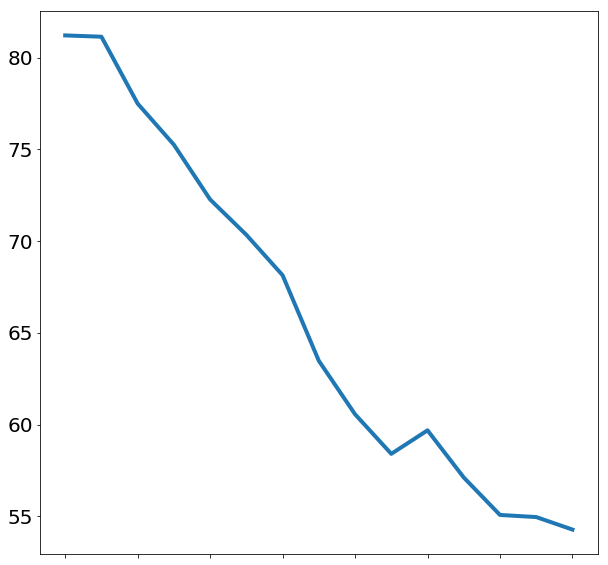

In [15]:
pic_avg=city_plot_avg.T.plot.line(x=city_plot_avg.index,figsize=(10,10),fontsize=20,linewidth=4)
